### **對單一訊號做標準化的結果**
**目的 : 凸顯異常訊號振幅、縮小背景訊號振幅** -> 用於異常檢測

In [1]:
import pywt
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft
import plotly.express as px

(1024,)


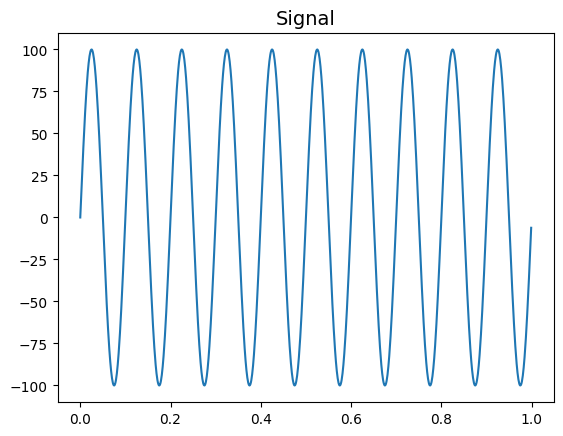

In [2]:
sample_rate = 1024 # 取樣頻率 [pts/sec] =fs (sampling frequency)
d = 1/sample_rate # 取樣間隔(週期) d = 1/fs [sec/pts]
t_domain = np.arange(0, 1.0, d)  # 畫出以取樣間隔 d，時間0~1秒的時域座標 : 共 1024個點
print(t_domain.shape)

f1 = 10
f2 = 20
f3 = 30
f4 = 40
data1 = np.piecewise(t_domain, [t_domain < 1],
                    [lambda t_domain : 100 * np.sin(2 * np.pi * f1 * t_domain)])
data4 = np.piecewise(t_domain, [t_domain < 1, (t_domain >= 0.3) & (t_domain < 0.5), t_domain < 0.3],
                    [lambda t_domain : 100 * np.sin(2 * np.pi * f1 * t_domain),
                     lambda t_domain : 40 * np.sin(2 * np.pi * f4 * t_domain),
                     lambda t_domain : 100 * np.sin(2 * np.pi * f1 * t_domain)])
plt.plot(t_domain, data1)
plt.title('Signal', fontsize = 14)
plt.show()

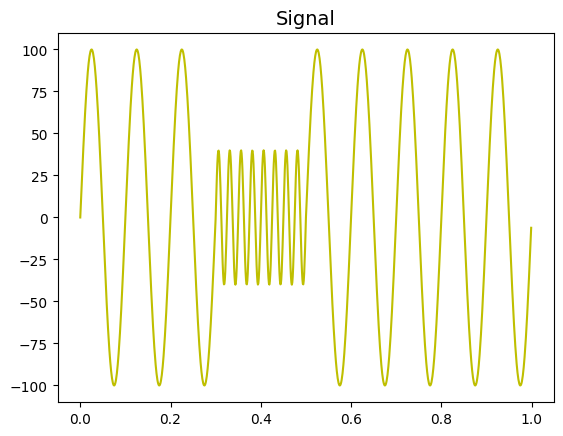

In [3]:
plt.plot(t_domain, data4, c = 'y')
plt.title('Signal', fontsize = 14)
plt.show()

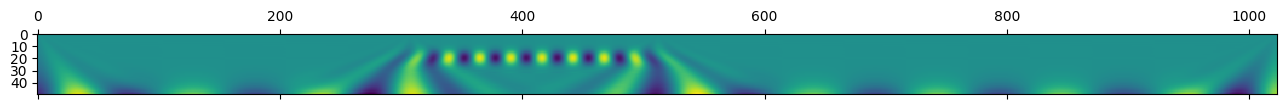

In [4]:
coef, freqs = pywt.cwt(data4, np.arange(1, 51), 'morl')
plt.matshow(coef) 
plt.show()

### **標準化**

In [5]:
from sklearn.preprocessing import StandardScaler


In [6]:
print(type(data1), data1.shape)


<class 'numpy.ndarray'> (1024,)


In [7]:
print(data1)

[  0.           6.13207363  12.24106752 ... -18.3039888  -12.24106752
  -6.13207363]


平均值 :  [4.4408921e-16]
標準差 : [70.71067812]


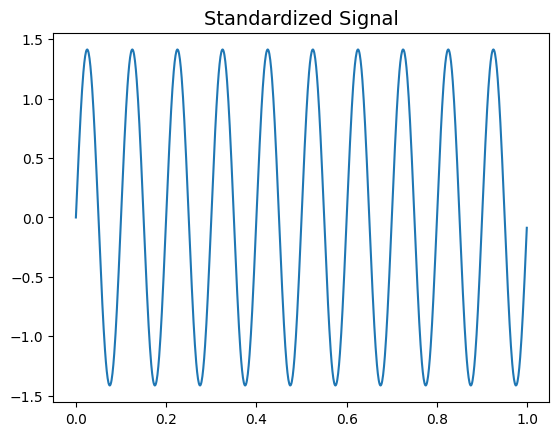

In [8]:
scaler = StandardScaler()
data1_standardized = scaler.fit_transform(data1.reshape(-1,1))
print('平均值 : ', scaler.mean_)
print('標準差 :', np.sqrt(scaler.var_))
plt.plot(t_domain, data1_standardized)
plt.title('Standardized Signal', fontsize = 14)
plt.show()

平均值 :  [0.00028821]
標準差 : [64.49806917]


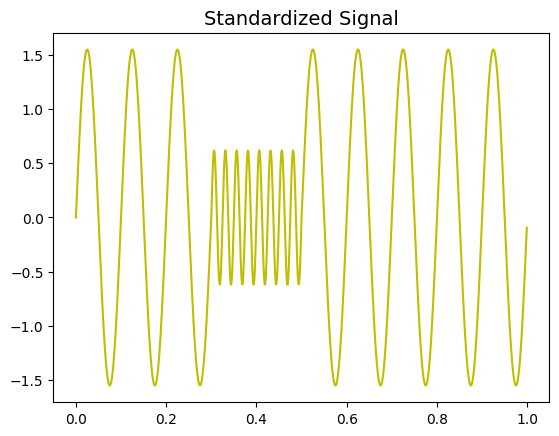

In [9]:
data4_standardized = scaler.fit_transform(data4.reshape(-1,1))
print('平均值 : ', scaler.mean_)
print('標準差 :', np.sqrt(scaler.var_))
plt.plot(t_domain, data4_standardized, c = 'y')
plt.title('Standardized Signal', fontsize = 14)
plt.show()

可以發現 : 異常訊號跟正常訊號個別進行標準化後，雖然整體形狀不變，但**凸顯了異常訊號的振幅，並縮小正常訊號的振幅**

### **拿真實資料做比對**

D:\bridge\data\NanmenBridge\103\20230906201800.txt


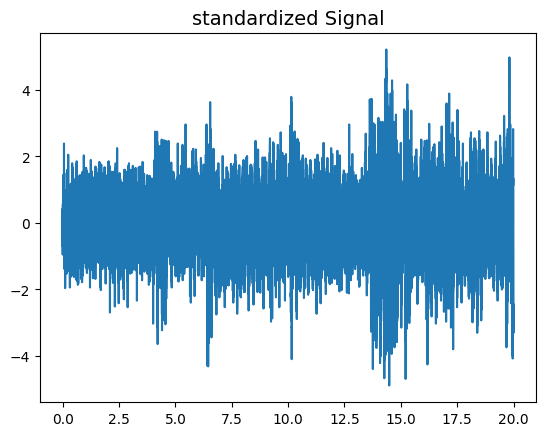

In [10]:
bridgeSensor1 = r'D:\bridge\data\NanmenBridge\103'
files_bridge1 = os.listdir(bridgeSensor1)
# 測試 : 只讀取最新的文件即可
file_path = os.path.join(bridgeSensor1,files_bridge1[-10]) #第一筆
print(file_path)
df_bridge_data = pd.read_csv(file_path, sep= ',')


# 過濾axis
BridgeDataOfAxis = np.array(df_bridge_data['accY']) # 此處指定axis = accY -> Y軸的時域信號值

standardized_BridgeDataOfAxis = scaler.fit_transform(BridgeDataOfAxis.reshape(-1,1))
t_domain = np.arange(BridgeDataOfAxis.shape[0]) * 0.001 # 建立時域座標
plt.plot(t_domain, standardized_BridgeDataOfAxis)
plt.title('standardized Signal', fontsize = 14)
plt.show()
# BridgeDataOfAxis = BridgeDataOfAxis - np.mean(BridgeDataOfAxis) # 減去平均值 -> 去掉DC(頻率 = 0)的訊號


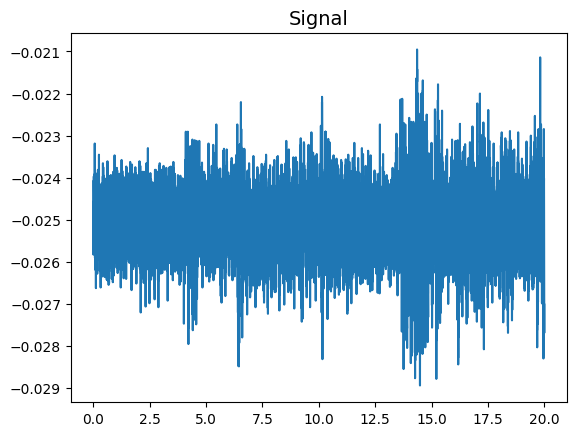

In [11]:
plt.plot(t_domain, BridgeDataOfAxis)
plt.title('Signal', fontsize = 14)
plt.show()

D:\bridge\data\NanmenBridge\103\20230829154557.txt


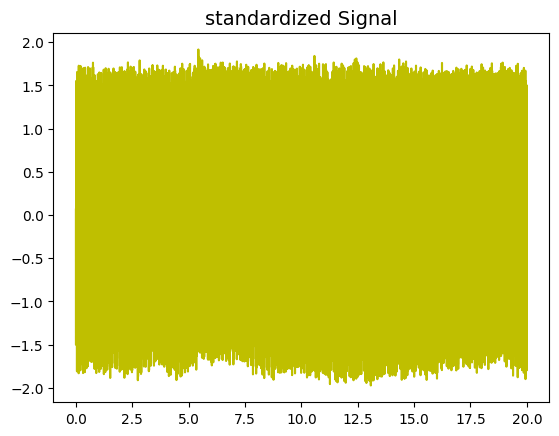

In [12]:
bridgeSensor1 = r'D:\bridge\data\NanmenBridge\103'
files_bridge1 = os.listdir(bridgeSensor1)
# 測試 : 只讀取最新的文件即可
file_path = os.path.join(bridgeSensor1,files_bridge1[10]) #第一筆
print(file_path)
df_bridge_data = pd.read_csv(file_path, sep= ',')


# 過濾axis
BridgeDataOfAxis = np.array(df_bridge_data['accY']) # 此處指定axis = accY -> Y軸的時域信號值
standardized_BridgeDataOfAxis = scaler.fit_transform(BridgeDataOfAxis.reshape(-1,1))
t_domain = np.arange(BridgeDataOfAxis.shape[0]) * 0.001 # 建立時域座標
plt.plot(t_domain, standardized_BridgeDataOfAxis, c = 'y')
plt.title('standardized Signal', fontsize = 14)
plt.show()
# BridgeDataOfAxis = BridgeDataOfAxis - np.mean(BridgeDataOfAxis) # 減去平均值 -> 去掉DC(頻率 = 0)的訊號


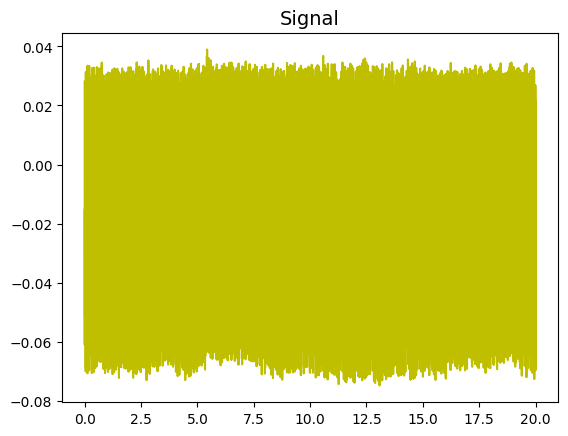

In [13]:
plt.plot(t_domain, BridgeDataOfAxis, c = 'y')
plt.title('Signal', fontsize = 14)
plt.show()

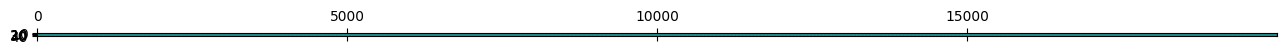

In [14]:
coef, freqs = pywt.cwt(BridgeDataOfAxis, np.arange(1, 51), 'morl')
plt.matshow(coef) 
plt.show()

In [15]:
BridgeDataOfAxis.shape

(20000,)

In [16]:
mean = np.mean(BridgeDataOfAxis)
print(mean)
print(scaler.mean_)

-0.017141666406250002
[-0.01714167]


In [17]:
std_dev = np.std(BridgeDataOfAxis)
print(std_dev)
print(np.sqrt(scaler.var_)) # 標準差 = sqrt(變異數)

0.029282301555740332
[0.0292823]


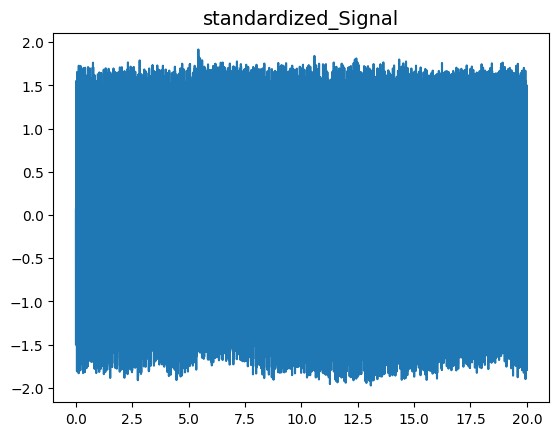

In [18]:
standardized_BridgeDataOfAxis = (BridgeDataOfAxis - mean) / std_dev
plt.plot(t_domain, standardized_BridgeDataOfAxis)
plt.title('standardized_Signal', fontsize = 14)
plt.show()

### **規一化後的訊號分布**

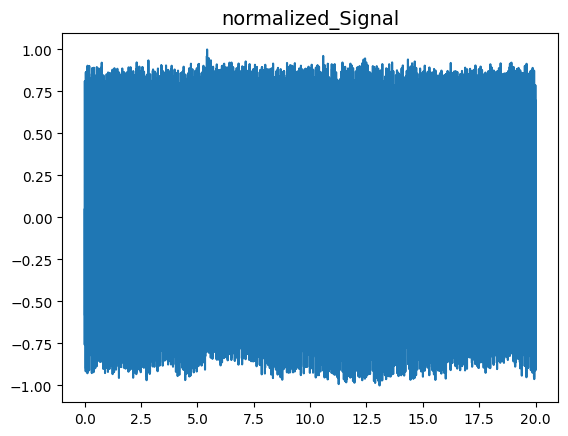

In [19]:
normalized_BridgeDataOfAxis = (BridgeDataOfAxis - np.min(BridgeDataOfAxis)) / \
    (np.max(BridgeDataOfAxis) - np.min(BridgeDataOfAxis)) * 2 - 1

plt.plot(t_domain, normalized_BridgeDataOfAxis)
plt.title('normalized_Signal', fontsize = 14)
plt.show()

In [20]:
A = np.array([80, 90, 85, 70, 95])
standardized_A = (A - np.mean(A)) / np.std(A)
normalized_A = (A - min(A)) / (max(A) - min(A))

print('標準化: ', standardized_A , '平均值: ', np.mean(A), '標準差:', np.std(A))
print('規一化: ', normalized_A)

標準化:  [-0.46499055  0.69748583  0.11624764 -1.62746694  1.27872403] 平均值:  84.0 標準差: 8.602325267042627
規一化:  [0.4 0.8 0.6 0.  1. ]


In [21]:
px.line(standardized_A)

In [22]:
coef.shape

(50, 20000)

In [23]:
# 降取樣 : 將 (50,20000)的矩陣 降取樣 -> 成為 (50, 100)
# -> 在原有矩陣(50,20000)中的每個欄位(column)每200 (= 20000/ 100)點取一個點即可 -> 取樣週期[s/pts] ↑，取樣頻率 ↓ 
step_size = coef.shape[1] // 100 
step_size
downsampled_coef = coef[:, ::step_size]

In [24]:
downsampled_coef.shape

(50, 100)

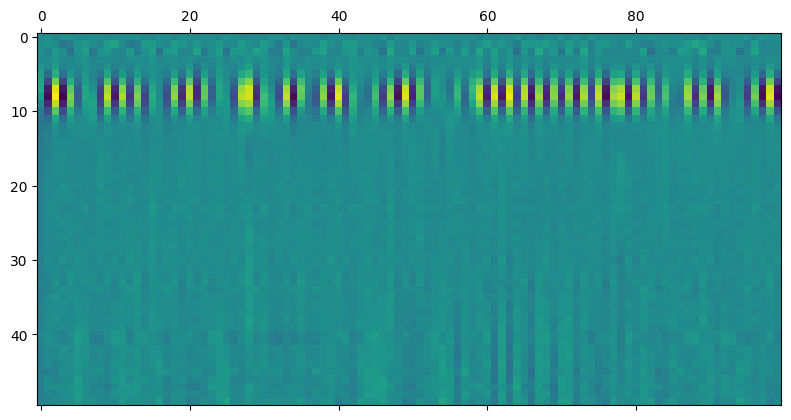

In [25]:
downsampled_coef[:,:]
plt.matshow(downsampled_coef) 
plt.show()

### 十進制 轉成 二進制 方法

除法的過程中，代表著 "使用以2為一組"這個方法的次數 = 2^(次數) : 次方項

In [ ]:
number = []
n = int(input("Please enter a decimal number to convert:"))
print(n)
print(bin(n))
while n >= 2:
    x = n % 2
    number.append(x)
    n = int(n / 2)
number.append(n)
print(number)
for d in reversed(number):
    print(d, end="")

34
0b100010
[0, 1, 0, 0, 0, 1]
100010

### 求數列依照常態分佈的平均值，標準差

In [ ]:
import numpy as np
# 擁有最大分輛的頻率為第一振態頻率值
maximum_aplitude_frequency_list = np.array([12.17, 10.50, 9.67, 12.67, 9.67, 13.25, 12.08,\
                                   10.25, 11.42, 12.33])
mean_value = np.mean(maximum_aplitude_frequency_list)
print("平均值 : ", np.mean(maximum_aplitude_frequency_list),"標準差 : ", np.std(maximum_aplitude_frequency_list))

11.401 1.227774002005255


In [ ]:
standard_deviation = np.sqrt(np.mean([(x - mean_value) ** 2 for x in maximum_aplitude_frequency_list]))
standard_deviation

1.227774002005255

In [ ]:
empty_list = []
for x in maximum_aplitude_frequency_list :
    deviation = (x - mean_value) ** 2
    empty_list.append(deviation)

standard_deviation = np.sqrt(np.mean(empty_list))

In [ ]:
standard_deviation


1.227774002005255